<a href="https://colab.research.google.com/github/daeyeong8855/statistical_data_analysis/blob/main/%ED%86%B5%EA%B3%84_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_%EC%9C%8C%EC%BD%95%EC%8A%A8_%EB%B6%80%ED%98%B8_%EC%88%9C%EC%9C%84_%EA%B2%80%EC%A0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import numpy as np
import pandas as pd
from scipy.stats import wilcoxon
import os
import matplotlib.pyplot as plt
import seaborn as sns

data1 = [20, 25, 30, 35, 40, 45, 50, 55, 60, 65]
data2 = [10, 20, 25, 30, 35, 40, 45, 50, 55, 60]

#윌콕슨 부호 순위 검정 수행
stat, p = wilcoxon(data1, data2)
print(stat, p)

if p > 0.05 :
  print("fail to reject H0")
else :
  print("reject H0")

0.0 0.001953125
reject H0


In [23]:
pre_treatment = np.random.randint(1,10, size=20)
post_treatment = np.random.randint(-3,4, size=20)

# 데이터 프레임
data = pd.DataFrame({
    "pre_treatment" : pre_treatment,
    "post_treatment" : post_treatment
})

print(data)

os.makedirs("./data", exist_ok=True)
data.to_csv("./data/treatment_data.csv", index=False, encoding='utf-8')


treatment_data = pd.read_csv("./data/treatment_data.csv")

stat, p = wilcoxon(data['pre_treatment'], data['post_treatment'])

print(stat,p)

if p > 0.05 :
  print("fail to reject H0")
else :
  print("reject H0")

    pre_treatment  post_treatment
0               6               2
1               8               3
2               1               2
3               9               0
4               5              -1
5               9               0
6               2               1
7               5              -1
8               7               1
9               7               1
10              8               3
11              1               2
12              2              -3
13              1               1
14              5              -1
15              8               2
16              4               1
17              3               1
18              9              -1
19              9               2
4.0 0.0002346492596103739
reject H0


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


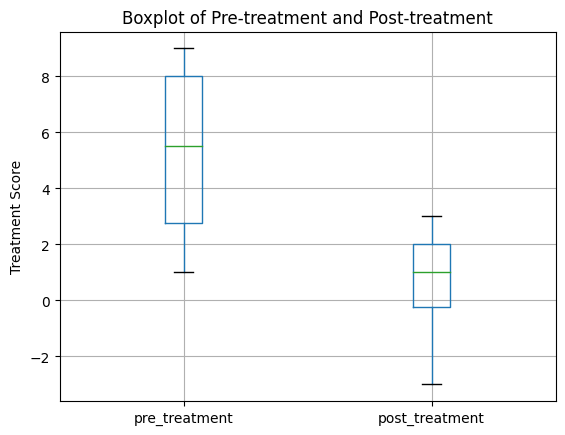

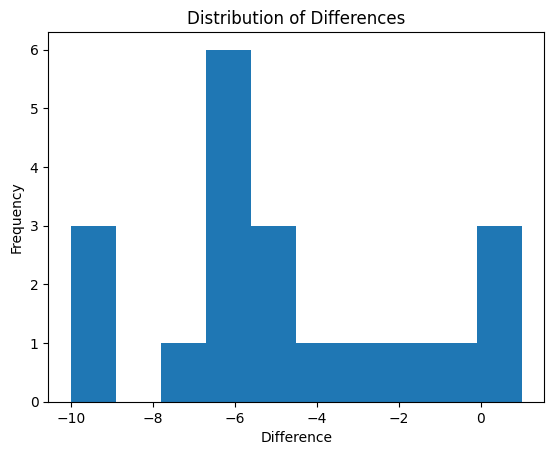

In [24]:
# boxplot 그리기
fig, ax = plt.subplots()
data.boxplot(['pre_treatment', 'post_treatment'], ax=ax)
ax.set_title('Boxplot of Pre-treatment and Post-treatment')
ax.set_ylabel('Treatment Score')
plt.show()

# 두 변수의 차이에 대한 분포를 시각화
fig, ax = plt.subplots()
data['diff'] = data['post_treatment'] - data['pre_treatment']
ax.hist(data['diff'], bins=10)
ax.set_title('Distribution of Differences')
ax.set_xlabel('Difference')
ax.set_ylabel('Frequency')
plt.show()

0.0 1.9073486328125e-06


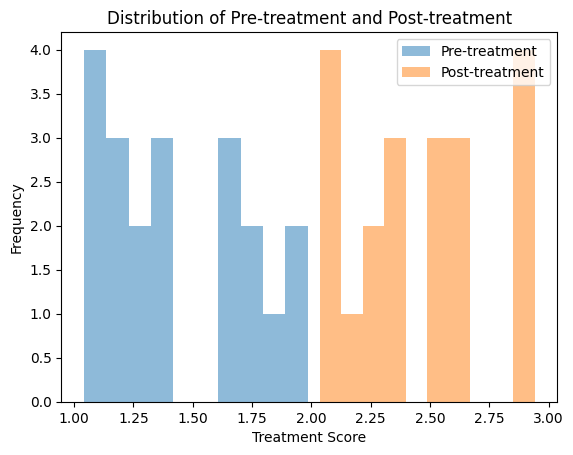

In [25]:
pre_treatment = np.random.rand(20) + 1
post_treatment = np.random.rand(20) + 2

treatment_data = pd.DataFrame({
    "pre_treatment" : pre_treatment,
    "post_treatment" : post_treatment
})

os.makedirs("./data", exist_ok = True)
treatment_data.to_csv("./data/data.csv", index=False, encoding="utf-8")

treatment_data = pd.read_csv("./data/data.csv")

stat, p = wilcoxon(treatment_data['pre_treatment'], treatment_data["post_treatment"])

print (stat, p)

fig, ax = plt.subplots()
ax.hist(treatment_data['pre_treatment'], bins=10, alpha=0.5, label='Pre-treatment')
ax.hist(treatment_data['post_treatment'], bins=10, alpha=0.5, label='Post-treatment')
ax.set_title('Distribution of Pre-treatment and Post-treatment')
ax.set_xlabel('Treatment Score')
ax.set_ylabel('Frequency')
plt.legend()
plt.show()